In [2]:
function rhs=T(n,x)
if (n==0) rhs=1; endif
if (n==1) rhs=x; endif
if (n>1)
rhs=2*x*T(n-1,x)-T(n-2,x);
endif
endfunction

function rhs=dT(n,x)
if (n==0) rhs=0; endif
if (n==1) rhs=1; endif
if (n==2) rhs=4*x; endif
if (n>2)
rhs=2*T(n-1,x)+2*x*dT(n-1,x)-dT(n-2,x);
endif
endfunction

function rhs=ddT(n,x)
if (n==0) rhs=0; endif
if (n==1) rhs=0; endif
if (n==2) rhs=4; endif
if (n==3) rhs=24*x; endif
if (n>3)
rhs=4*dT(n-1,x)+2*x*ddT(n-1,x)-ddT(n-2,x);
endif
endfunction

%%Define the function f
function rhs=f(n,h,t,y) 
% n: the number of ODE in ODE system
% h: step-size    
    rhs=zeros(1,n);
    rhs(1)=0;
    for i=2:n-1
        rhs(i)=1/h^2 * y(i-1)+(1-2/h^2)*y(i)+1/h^2 * y(i+1);
    endfor
    rhs(n)=0;
endfunction

In [3]:
%% RKC method with 10 stages.
function [h,t,y]=rkc10heat(a,b,y0,N,s)
%%Input   %a,b: starting, final time 
          %y0: initial value
          %N: number of time interval
          %s: number of stages
%%Output  %h: stepsize
          %t: timegrid
          %y: numerical solution
    h = (b-a)/N;
    t = a:h:b;
    epsilon = 0.05;  %damping parameter    
    w0 = 1+epsilon/s^2;
    w1 = dT(s,w0)/ddT(s,w0);
    %%Define coefficients
    b = a = mu = nu = c= mu_t = gamma_t = zeros(s+1,1);
    b(1) =  b(2) = b(3) = ddT(2,w0) / (dT(2,w0) ^2 );
    for i=4:s+1
        b(i)=ddT(i-1,w0)/((dT(i-1,w0))^2);
    endfor
    
    % a_j+1=1-b_{j+1}*T_j(w0)
    for i=2:s+1
        a(i)=1-b(i)*T(i-1,w0);
    endfor    

    %mu_j+1=-2b_jw_0/b_{j-1}
    for i=3:s+1
        mu(i) = 2 * w0 * b(i) / b(i-1);
    endfor
    
    %nu_j=-b_j/(b_{j-2})
    for i = 3:s+1
        nu(i) = -b(i) / b(i-2); 
    endfor
    
    %c_j=w1*b_j*T'_j(w0)
    for i=2:s
        c(i) = w1 * b(i) * dT(i-1,w0);
    endfor    
    c(s) = 1;
    
    %mu_t(i) = 2 * w1*b(i) / b(i-1)
    mu_t(2) = b(2)*w1;
    for i = 3:s+1
        mu_t(i) = 2 * w1 *b(i) / b(i-1);
    endfor
    
    %gamma_t= -a_{j-1} *mu_t(j)
    gamma_t(2) = c(2);
    for i = 3:s+1
        gamma_t(i) = - a(i-1) * mu_t(i);
    endfor
    
    %%%% Main loop
    g = zeros(s+1,N+1);
    y=zeros(N+1,N+1);
    y(1,:) = y0;
    for i = 1:N
        g(1,:) = y(i,:);
        g(2,:) = g(1,:) + mu_t(2) * h * f(N+1,h,t(i)+c(1)*h,g(1,:));
        for j=3:s+1
            g(j,:) = (1-mu(j)-nu(j)) * g(1,:) + mu(j)* g(j-1,:) + nu(j)*g(j-2,:) + mu_t(j) * h * f(N+1,h,t(i)+c(j-1),g(j-1,:)) + gamma_t(j) * h * f(N+1,h,t(i)+c(1)*h,g(1,:));
        endfor
        y(i+1,:) = g(s+1,:);
    endfor      
endfunction

err =  0.38906


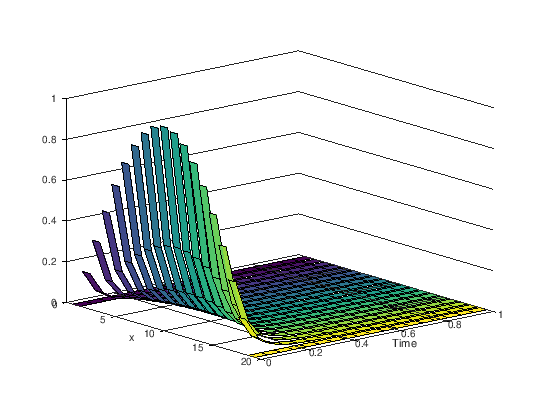

In [5]:
%%Plot the numerical solution.
a=0;
b=0.5;
N=18;
s=15;
h=(b-a)/N;
y0=zeros(1,N+1);
for i=1:N+1
    y0(i)=sin(pi/(N) * (i-1));
endfor
[h,t,y] = rkc10heat(a,b,y0,N,s);
xgrid=linspace(0,1,N+1);
ribbon(xgrid',y);
view([50 20])
xlabel('x')
ylabel('Time')
err=0;
for i=1:N+1
    for j=1:N+1
        err = max (err, y(i,j) -e.^((1-pi^2)*i/N).*sin(pi*xgrid(j)));
    endfor
endfor
err

err =  0.25595


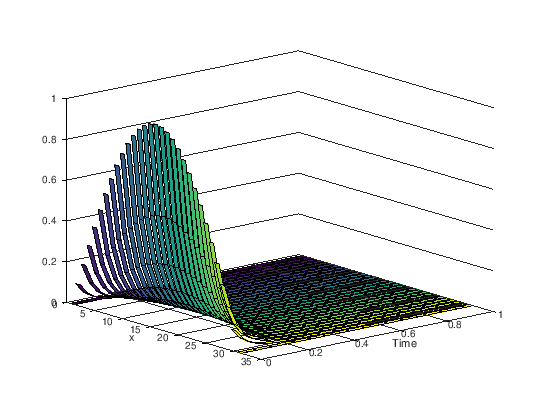

In [6]:
%%Plot the numerical solution.
a=0;
b=0.5;
N=30;
s=19;
h=(b-a)/N;
y0=zeros(1,N+1);
for i=1:N+1
    y0(i)=sin(pi/(N) * (i-1));
endfor
[h,t,y] = rkc10heat(a,b,y0,N,s);
xgrid=linspace(0,1,N+1);
ribbon(xgrid',y);
view([50 20])
xlabel('x')
ylabel('Time')
err=0;
for i=1:N+1
    for j=1:N+1
        err = max (err, y(i,j) -e.^((1-pi^2)*i/N).*sin(pi*xgrid(j)));
    endfor
endfor
err

In [12]:
T(25,2)

ans =  99462344632562


In [7]:
%%Plot the numerical solution.
a=0;
b=0.5;
N=49;
s=25;
h=(b-a)/N;
y0=zeros(1,N+1);
for i=1:N+1
    y0(i)=sin(pi/(N) * (i-1));
endfor
[h,t,y] = rkc10heat(a,b,y0,N,s);
xgrid=linspace(0,1,N+1);
ribbon(xgrid',y);
view([50 20])
xlabel('x')
ylabel('Time')
err=0;
for i=1:N+1
    for j=1:N+1
        err = max (err, y(i,j) -e.^((1-pi^2)*i/N).*sin(pi*xgrid(j)));
    endfor
endfor
err

In [2]:
x=[1 2 5; 3 4 6]
x(1,:)

x =

   1   2   5
   3   4   6



ans =

   1   2   5

